# Flood Risk Prediction

## Objective:

The objective of this activity is to apply supervised machine learning algorithms to predict
the risk of flooding based on environmental and meteorological features. Students will
utilize models such as Logistic Regression, Decision Tree, Random Forest, SVM, Ridge,
and Lasso Regression to analyze real-world data and make predictions.

### Dataset:

You will use the publicly available dataset from Kaggle to perform this activity:
Flood Prediction Dataset – Kaggle 
https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset




### Problem Statement:

Floods are one of the most frequent and devastating natural disasters, often resulting from
heavy rainfall, river overflow, or inadequate drainage systems. The ability to predict flood
occurrence based on environmental conditions can significantly aid disaster preparedness
and response efforts. In this activity, you are tasked with building and evaluating machine
learning models that predict whether a flood is likely to occur given a set of meteorological
and hydrological features


### Tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data preprocessing steps

In [3]:
### Load the dataset and explore its structure (columns, data types, missing values, etc.)
df = pd.read_csv('flood.csv')

# Display first 5 rows
df.head()

# Show column names and data types
df.info()

# Show missing values per column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [4]:
# Perform basic data preprocessing (handle missing values, encode categorical variables if any, and split the data into train/test sets)
df_encoded = pd.get_dummies(df, drop_first=True)
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training and evaluation

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Convert FloodProbability to binary target
y_binary = (y > 0.5).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {"Accuracy": acc, "F1-score": f1}

for name, scores in results.items():
    print(f"{name}: Accuracy = {scores['Accuracy']:.3f}, F1-score = {scores['F1-score']:.3f}")

Logistic Regression: Accuracy = 1.000, F1-score = 1.000
Decision Tree: Accuracy = 0.691, F1-score = 0.670
Random Forest: Accuracy = 0.891, F1-score = 0.880


Logistic Regression had the highest Accuracy and highest F-1 Score → best model.

### Feature importance analysis

In [ ]:
# Coefficients from Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
coefs = lr.coef_[0]
coef_imp = pd.Series(coefs, index=feature_names).sort_values(key=abs, ascending=False)
print("Logistic Regression Coefficients (absolute value):")
print(coef_imp.head(10))

# Feature importance from Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = X.columns

# Display top features
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\n Random Forest Feature Importances:")
print(feat_imp.head(10))

# Feature importance from Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_importances = dt.feature_importances_
dt_feat_imp = pd.Series(dt_importances, index=X.columns).sort_values(ascending=False)
print("\n Decision Tree Feature Importances:")
print(dt_feat_imp.head(10))


Logistic Regression Coefficients (absolute value):
PopulationScore                5.310255
ClimateChange                  5.309222
DamsQuality                    5.308136
CoastalVulnerability           5.307710
DeterioratingInfrastructure    5.304536
TopographyDrainage             5.301637
Watersheds                     5.298138
Encroachments                  5.297339
DrainageSystems                5.296622
PoliticalFactors               5.295729
dtype: float64
Random Forest Feature Importances:
DamsQuality                        0.051747
Watersheds                         0.051718
IneffectiveDisasterPreparedness    0.051438
TopographyDrainage                 0.051419
PopulationScore                    0.050946
Landslides                         0.050789
DeterioratingInfrastructure        0.050623
PoliticalFactors                   0.050174
Siltation                          0.050141
AgriculturalPractices              0.050001
dtype: float64
Decision Tree Feature Importances:
Agricult

###  Final conclusions

### Results

The results show that features like Watersheds, Ineffective Disaster Preparedness, Topography Drainage, Dams Quality, and Population Score are highly influential in predicting flood occurrence. Both Random Forest and Logistic Regression highlight infrastructure, environmental, and preparedness factors as key drivers.

### Interpretation:

Areas with poor watershed management, ineffective disaster preparedness, and deteriorating infrastructure are at higher flood risk.
Population density, climate change, and urbanization also play significant roles.


### Real-world usefulness:
Such models help disaster management agencies prioritize interventions, allocate resources, and plan preventive measures. By identifying critical risk factors, authorities can improve infrastructure, enhance preparedness, and focus on vulnerable regions, ultimately reducing flood impact and saving lives.

### Extra Visualizations:

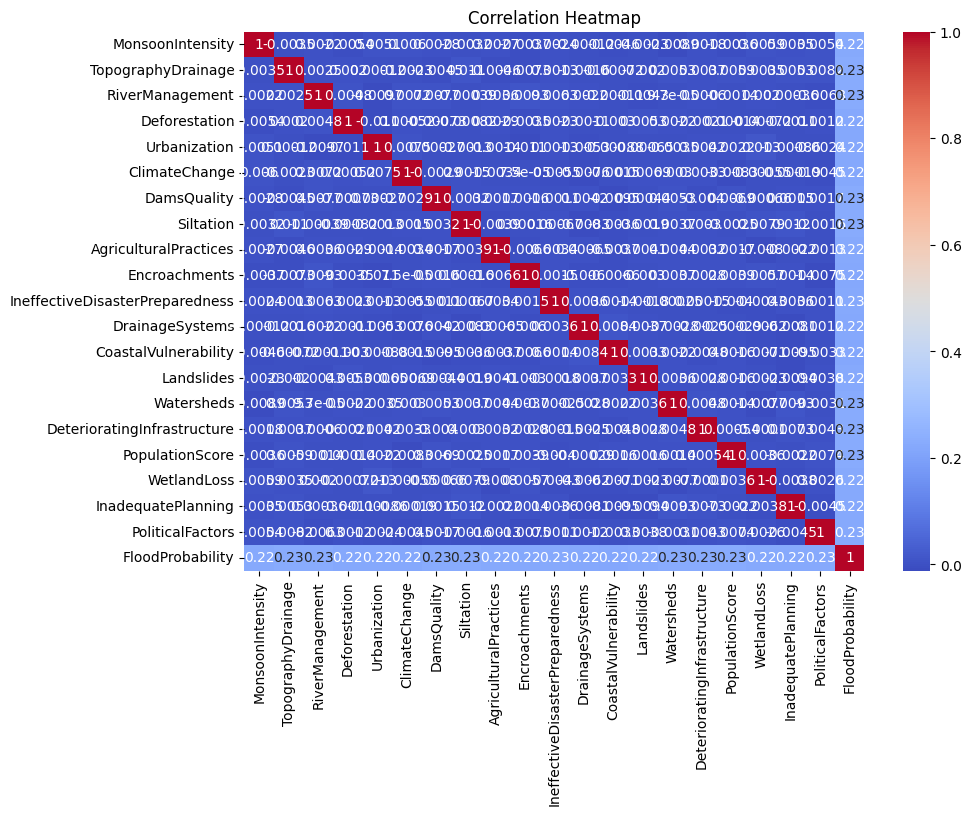

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

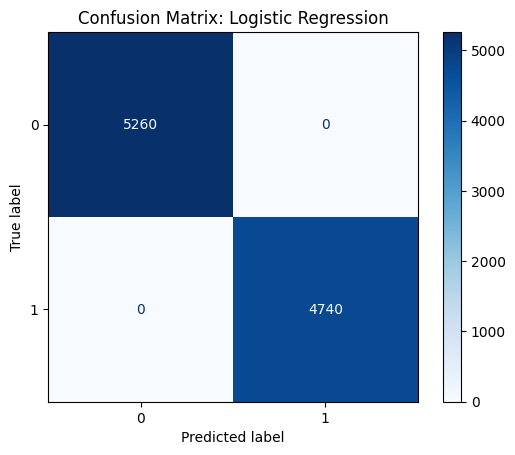

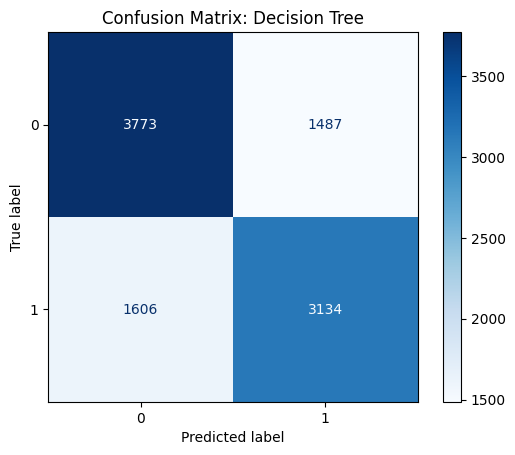

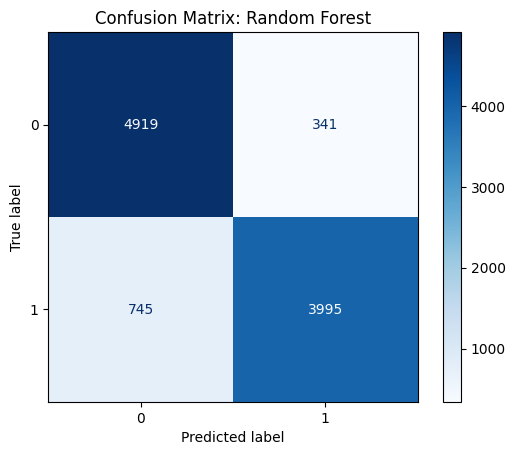

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot Confusion Matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

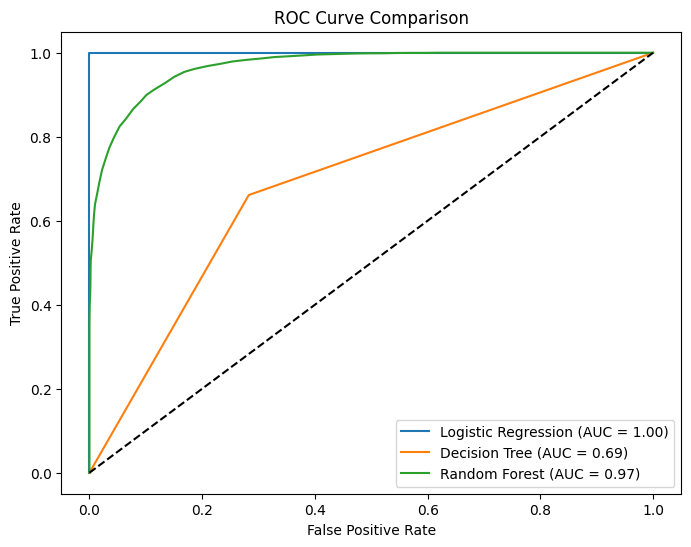

In [15]:
from sklearn.metrics import roc_curve, auc
# Plot ROC Curve for each model
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    else:
        y_score = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

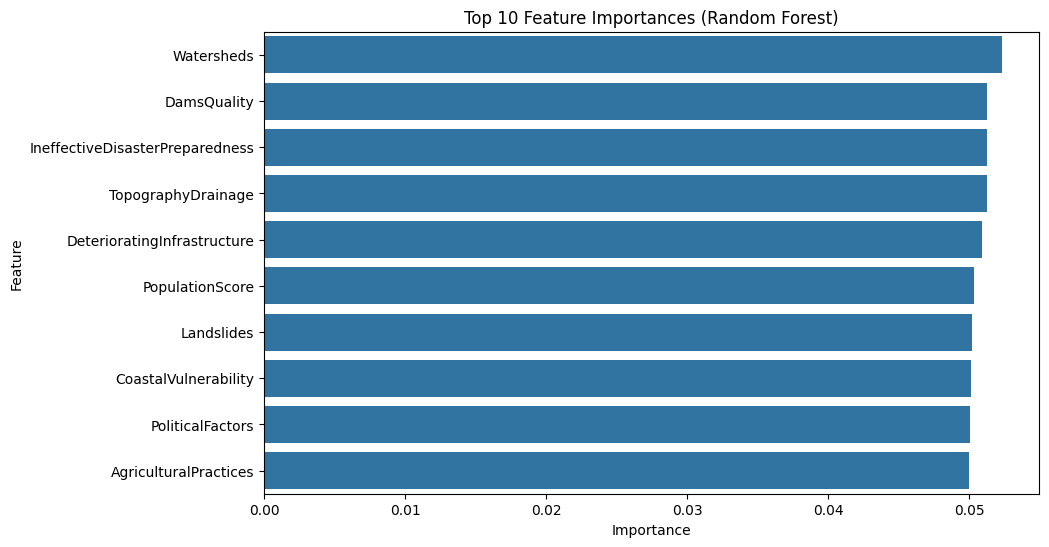

In [16]:
# Feature Importance Bar Plot for Random Forest
rf = models["Random Forest"]
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

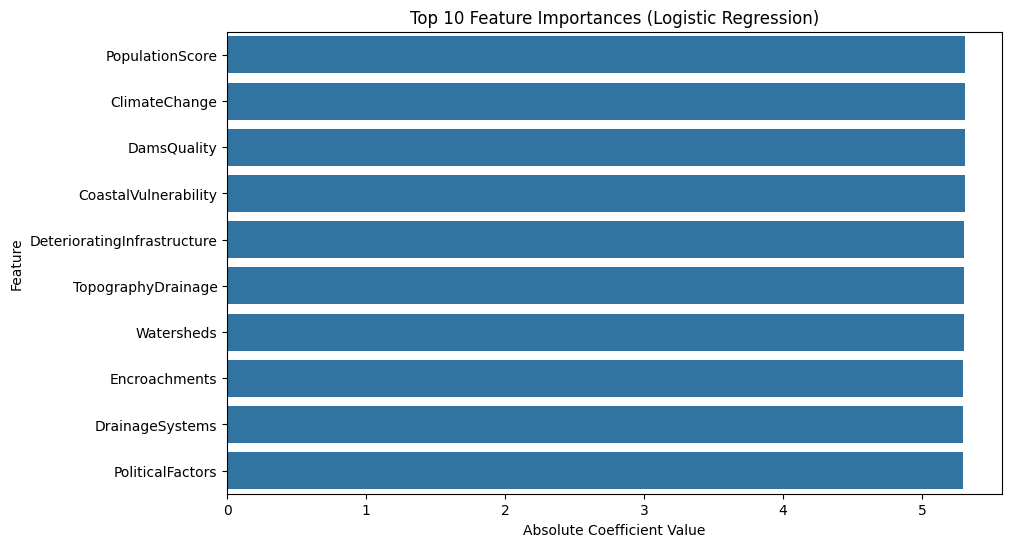

In [17]:
# Feature Importance Bar Plot for Logistic Regression
lr = models["Logistic Regression"]
coefs = lr.coef_[0]
feature_names = X.columns
coef_imp = pd.Series(np.abs(coefs), index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=coef_imp.values[:10], y=coef_imp.index[:10])
plt.title("Top 10 Feature Importances (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.show()